# RNN (Recurent Neural Network)
* 해당 학습은 [김성원교수의 모두를 위한 머신러닝/딥러닝 강의](https://hunkim.github.io/ml/)와 [텐서플로우로 시작하는 딥러닝 기초](https://www.boostcourse.org/ai212/joinLectures/25072) 의 강의를 통해 진행하였습니다. 
* 순환신경망 ( venila RNN / LSTM / GRU )에 대한 자세한 이론적 학습은 이전에 주가예측을 위한 모형 고안을 하던 당시 학습한 기록이 남아 있습니다. 
[RNN study](https://github.com/jun3599/Stock_Market_prediction/blob/main/recurent_neural_network.ipynb)
* 이번 강좌에서는 보다 Low Level API를 이용하여 모형을 구현하고, 순환신경망에 대한 심층적인 이해와 복습을 목적으로 학습을 진행합니다. 

# 순환신경망의 기본적 개념 

## Idea of RNN 

* 기존의 신경망들은, 입력과 출력의 구조가 일방향적인 학습이 이루어지는 구조였습니다. ![cf.png](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FMe6NZ%2FbtqAkybHfbJ%2Ffx5NKmeXgq8nR5XkiStpFK%2Fimg.png) 따라서, '동그라미'로 표현되는 하나의 셀은 구체적으로 이전 layer에서 입력된 값들에 각자의 고유 가중치를 내적하여 다음 layer의 각 cell들에게 일방적으로 전달하는 구조를 가지고 있습니다. 

![net_with_rnn.png](https://gblobscdn.gitbook.com/assets%2F-LvBP1svpACTB1R1x_U4%2F-LwEQnQw8wHRB6_2zYtG%2F-LwEZT8zd07mLDuaQZwy%2Fimage.png?alt=media&token=93a3c3e2-e32b-4fec-baf5-5e6b092920c4) 
* 반면, RNN 계열의 신경망의 전체 모습은, 위에서 보이는 바와 같이 하나의 cell에서 일어나는 연산이 다소 복잡한 구조로 이루어져 있습니다. 
* 즉, 하나의 Cell은 자신의 이전 출력값을 새로운 입력과 함께 입력받으며 출력값을 계산합니다. 
* 즉, 현재의 값을 계산하기 위해 이전까지의 결과를 함께 고려하는 구조의 신경망입니다. 
* 이러한 특성 덕택에, RNN Cell을 이용한 순환신경망은 순서를 갖는 Sequence data를 효율적으로 처리 가능하다는 특성을 지닙니다. 

## RNN의 구조 

##### Venila RNN의  Cell 구조 
![venilaRNNCell.png](https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile23.uf.tistory.com%2Fimage%2F2578204757AC186F2A70DC)
* 위의 그림은 하나의 RNN Cell의 구조를 보여줍니다. 그림의 왼쪽을 이해의 편리함을 위해 오른쪽 그림처럼 펼져 이해해 보겠습니다. 

* 그림과 같이 RNN 계열의 신경망은 은닉층의 노드에서 활성화 함수를 통해 나온 결과값을 출력층 방향으로도 보내면서, 다시 은닉층 노드의 다음 계산의 입력으로 보내는 특징을 갖고있습니다.  

* 은닉층의 각 메모리셀은 각각의 시점에서 바로 이전시점에서의 은닉층의 메모리 셀에서 나온 값을 자신의 입력으로 사용하는 재귀적 활동을 수행함

* 메모리 셀이 출력층 방향으로 또는 다음 시점 t+1의 자신에게 보내는 값을 은닉 상태(hidden state) 라고 합니다. 다시 말해 t 시점의 메모리 셀은 t-1 시점의 메모리 셀이 보낸 은닉 상태값을 t 시점의 은닉 상태 계산을 위한 입력값으로 사용합니다.

##### RNN Cell 의 계산 절차 details 

![rnnCal.png](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/12/06022525/bptt.png)


* 하나의 RNN Cell은 위와 같은 방식의 계산을 진행합니다. 
    - RNN Cell은 새로운 입력을 받는 부분과, 이전의 과정에서 도출된 값을 받는 부분으로 이루어져 있습니다. 
    - 각각의 과정에서는 새로운 입력에 대한 가중치 W_xh와 이전의 값의 입력에 대한 가중치인 W_hh를 이용하여 값을 계산하고, 최종적으로 활성함수(주로 tanh)를 적용하여 다음층으로 값을 넘겨주는것과 동시에, W_yh를 곱한 값을 출력층으로 전달합니다.   
    
    $$h_t = f_w(h_{t-1}, x_t)$$  
    
    $$h_t = tanh(W_{hh}h_{t-1} + W_{xh}x_t)$$  
    $$y_t = W_{hy}h_t$$

##### 계산 예시 
![examRnn.png](https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile23.uf.tistory.com%2Fimage%2F243AD34957ADEEE633DE7B) 
* 위의 계산 과정은 Hello 라는 하나의 단어를 sequence 형태로 변환후, 이를 개별적인 원핫백터로서 입력하여 Hell 다음에 오는 데이텀을 예측하는 모형의 예시입니다. 

## +𝛼 : Tensor의 차원 이해하기 

![tensor.png](https://res.cloudinary.com/practicaldev/image/fetch/s--VaxrSdrA--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://thepracticaldev.s3.amazonaws.com/i/bp6ux6ppf5t5amwkxklq.jpg)

* 텐서는 기본적으로 어떠한 집합을 원소로 갖는 구조를 의미합니다. 
    - 예를 들어, rank가 2인 행렬을 원소로 갖는 텐서를 3D 텐서라고 합니다. 
    - 또한 이러한 3D tensor를 원소로 갖는 텐서를 4D 텐서라고 합니다. 
    - 즉, 자신의 원소로써, 자신보다 낮은 차원의 원소를 포함하는 구조를 N-D tensor라고 부릅니다. 
* 텐서의 일반적인 차원에 대한 표기 방식은, 가장 낮은 차원의 구성 갯수를 왼쪽에서 시작해, 오른쪽에는 가장 큰 차원이 갖는 원소의 수를 적습니다. 
    - 예를들어, 
    $$\matrix{[[[1, 2, 3, 4],[5, 6, 7, 8],[9, 10, 11, 12]],\\
    [[1, 2, 3, 4],[5, 6, 7, 8],[9, 10, 11, 12]]]}$$  
    
    위의 수식은 두개의 행렬을 원소로 갖는 3D tensor 구조를 보여줍니다. 이때 각 행렬은 3개의 벡터를 포함하고 있으며, 각각의 벡터는 4개의 차원을 갖습니다. 
    * 이를 텐서의 차원으로 표기하면 Tensor(2,3,4)로 표기할 수 있습니다. 

# Basic of RNN 

## Basic of RNN1. 하나의 벡터 입력 받기
* 가장 간단한 RNN모형의 구현을 통해 모형의 기초 사항에 대해 살펴봅니다.
* 구현할 모형에 대한 상세사항은 다음과 같습니다. 
![basicRNNexam.png](https://camo.githubusercontent.com/db4a71ef36402dca5f6d3787bf4035a4eb1c4839/68747470733a2f2f636c6f75642e67697468756275736572636f6e74656e742e636f6d2f6173736574732f3930313937352f32333334383732372f63633938313835362d666365372d313165362d383365612d3462313837343733343636622e706e67)  
    - 모형의 목적 : 한가지 단어의 스펠링을 문자단위로 입력받아, 다음 문자를 예측하는 모형을 구현합니다. 
    - 모형의 형태 : 하나의 vienila Rnn Cell로 이루어진 모형을 이용합니다. 
        

### 필요 라이브러리 불러오기 

In [1]:
import numpy as np 
import tensorflow as tf 
from tensorflow import keras 

# 우리가 사용할 simpleRNNCell, RNN, SimpleRNN을 담고 있습니다. 
from tensorflow.keras import layers 

# 모형 생성기 
from tensorflow.keras import Sequential, Model 

### 학습용 데이터 준비하기 

In [2]:
# 원한 벡터 형태로 각 글자를 표현합니다. 
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]

### 모형 구현 
* 모형을 구현하는 방식에는 크게 두가지 방식이 있습니다. 
    - 방식1. : Cell을 별도로 생성하고 이를 RNN 전용 드라이버에 인자로 넘겨주는 방식  
    - 방식2. : Cell을 별도로 생성하지 않고, 즉각적으로 모형 생성하기   
( 방식1과 같은 방법을 사용하는 이유는 모형을 유동적으로 변경하고, 다룰수 있다는 장점에 있습니다.)

#### 방식1. 
* layers.SimpleRNNCell을 활용하여 하나의 셀을 만든 후, 
* layers.RNN에 해당 셀을 전달함으로써 모형을 구성합니다. 

In [3]:
# 하나의 RNN Cell을 생성합니다. 
# 모형을 (input dim = 4 --> output dim = 2 ) 구조로 생성합니다. 

# 데이터의 형태 정의 
x_data = np.array([[h]], dtype=np.float32)
# [[h]] == [[[1,0,0,0]]]  --> shape (1, 1, 4)

# 셀과 셀 컴파일러 정의 
hidden_size = 2  # 우리가 원하는 출력의 차원, 즉 출력 유닛수 
cell = layers.SimpleRNNCell(units=hidden_size) # unit옵션은 출력 신호의 수를 지정 
rnn = layers.RNN(cell= cell, return_sequences=True, return_state=True)
# 데이터의 입력 및 값 계산 
outputs, states = rnn(x_data)

# 결과의 출력 
print('x_data: {}, shape : {}'.format(x_data, x_data.shape))
print('outputs: {}, shape: {}'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]]], shape : (1, 1, 4)
outputs: [[[ 0.05821195 -0.42081955]]], shape: (1, 1, 2)
states: [[ 0.05821195 -0.42081955]], shape: (1, 2)


[딥러닝을 이용한 자연어처리 입문](https://wikidocs.net/106473)
* return_sequences=True를 선택하면 메모리 셀이 모든 시점(time step)에 대해서 은닉 상태값을 출력하며, 별도 기재하지 않거나 return_sequences=False로 선택할 경우에는 메모리 셀은 하나의 은닉 상태값만을 출력합니다. 그리고 이 하나의 값은 마지막 시점(time step)의 메모리 셀의 은닉 상태값입니다.

* return_state가 True일 경우에는 return_sequences의 True/False 여부와 상관없이 마지막 시점의 은닉 상태를 출력합니다. 가령, return_sequences가 True이면서, return_state를 True로 할 경우 SimpleRNN은 두 개의 출력을 리턴합니다.첫번째 출력은 return_sequences=True로 인한 출력으로 모든 시점의 은닉 상태입니다. 두번째 출력은 return_state=True로 인한 출력으로 마지막 시점의 은닉 상태입니다. 

##### 결과의 해석 
* 위의 학습 결과에서, outputs와 states에는 같은 값이 들어가 있지만, 차원이 다른 모습을 보여줍니다. 
    - 이는, outputs의 경우 모든 sequence의 결과값을 담고 있음을 말하고, states에는 마지막 hiddenstate의 결과만을 담고 있음을 알 수 있습니다 

#### 방식2: 한줄의 코드로 만들기 
* 위의 방식과 같은 결과를 만들어냅니다. 
* 하지만, 이의 경우 모형의 셀을 유동적으로 변경할 수 없다는 단점을 지닙니다. 

In [4]:
x_data = np.array([[h]],dtype=np.float32)

# 보다 high level API로 한줄로 간편하게 생성이 가능합니다. 
rnn = layers.SimpleRNN(units=hidden_size, return_sequences=True, return_state=True)

outputs, states = rnn(x_data)

print('x_data: {}, shape: {}'.format(x_data, x_data.shape))
print('outputs: {}, shape: {}'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]]], shape: (1, 1, 4)
outputs: [[[ 0.26618353 -0.37249312]]], shape: (1, 1, 2)
states: [[ 0.26618353 -0.37249312]], shape: (1, 2)


## Basic of RNN2: 시퀀스 형태의 입력 받기 

##### Unfolding to n Sequence 
![basicRNNexam2.png](https://camo.githubusercontent.com/194a1b757f5f0c000f1b1a83a1747da3f8489b48/68747470733a2f2f636c6f75642e67697468756275736572636f6e74656e742e636f6d2f6173736574732f3930313937352f32333338333633342f36343965666430612d666438322d313165362d393235642d3830343132343237343362302e706e67)

* 이번에는 4개의 차원으로 이루어진 Vector 5개를 원소로 갖는 1개의 Metrix를 입력으로 제공하겠습니다. 

##### 데이터 형태 생성 

In [5]:
x_data = np.array([[h, e, l, l, o]], dtype = np.float32)

### 방식 1.

##### 셀 생성 및 초기화 

In [6]:
hidden_size = 2 
cell = layers.SimpleRNNCell(units=hidden_size)
rnn = layers.RNN(cell=cell, return_sequences=True, return_state= True)

##### 학습 및 결과 출력 

In [7]:
outputs, states = rnn(x_data)

In [8]:
print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]], shape: (1, 5, 4) 

outputs: [[[ 0.5424151  -0.5437594 ]
  [-0.7516673   0.855709  ]
  [ 0.29133034 -0.7488676 ]
  [-0.9129436  -0.43150187]
  [-0.40806997 -0.58041596]]], shape: (1, 5, 2) 

states: [[-0.40806997 -0.58041596]], shape: (1, 2)


### 방식2. 

###### 셀 생성 및 초기화 

In [9]:
hidden_size = 2 

rnn = layers.SimpleRNN(units=hidden_size, return_sequences= True, return_state= True)

##### 학습 및  결과 출력 

In [10]:
outputs, states = rnn(x_data)

In [11]:
print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]], shape: (1, 5, 4) 

outputs: [[[-0.7172524   0.711289  ]
  [ 0.64156586  0.85676116]
  [ 0.43649918 -0.90608877]
  [-0.8634083  -0.911343  ]
  [-0.8824211   0.9260854 ]]], shape: (1, 5, 2) 

states: [[-0.8824211  0.9260854]], shape: (1, 2)


## Basic of RNN: Batching input 

![basicRNNexam3.png](https://camo.githubusercontent.com/36e4d1308f70201943dd019c5b5f7b3569f1f5bb/68747470733a2f2f636c6f75642e67697468756275736572636f6e74656e742e636f6d2f6173736574732f3930313937352f32333338333638312f39393433613966632d666438322d313165362d383132312d6264313837393934653234392e706e67)

* 이번에는 4개의 글자로 구성된 3개의 단어를 원소로 갖는 하나의 3d tensor를 입력으로 제공해 보겠습니다. 

In [12]:

# One cell RNN input_dim (4) -> output_dim (2). sequence: 5, batch 3
# 3 batches 'hello', 'eolll', 'lleel'
x_data = np.array([[h, e, l, l, o],
                   [e, o, l, l, l],
                   [l, l, e, e, l]], dtype=np.float32)

hidden_size = 2
rnn = layers.SimpleRNN(units=2, return_sequences=True, return_state=True)    
outputs, states = rnn(x_data)

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]], shape: (3, 5, 4) 

outputs: [[[ 0.587694    0.27291715]
  [ 0.0587311   0.73999214]
  [ 0.02868586  0.30735892]
  [ 0.3823171   0.09790175]
  [ 0.21077834  0.81382513]]

 [[ 0.04168834  0.29379526]
  [-0.1125332   0.7260708 ]
  [-0.03502973  0.1567525 ]
  [ 0.46939644 -0.02585174]
  [ 0.71496844  0.33160612]]

 [[ 0.58185506 -0.06414629]
  [ 0.75376153  0.40390375]
  [ 0.01538492  0.8202128 ]
  [-0.59539676  0.59246236]
  [-0.12951216 -0.32195243]]], shape: (3, 5, 2) 

states: [[ 0.21077834  0.81382513]
 [ 0.71496844  0.33160612]
 [-0.12951216 -0.32195243]], shape: (3, 2)


## Basic of RNN : Many to One - Sentiment classification 
* 여러개의 입력을 받아 하나의 값을 산출하는 모형을 구현합니다. 
* 여기에서는, 여러개의 단어로 구성된 각각의 문장을 입력으로 받아, 최종적으로 각 문장의 (긍정/ 부정) 감정을 분류하는 모형을 구성합니다.
* cf) RNN의 입력과 출력 
![inout.png](https://i.stack.imgur.com/b4sus.jpg)

##### Padding 
* 패딩은 자연어 처리 분야에서 빈번히 사용되는 방식입니다. 이는 입력되는 데이터의 길이를 맞추기 위한 장치입니다. 
* 예를 들어 단어를 문자단위로 인식해 입력을 전달 받는 모형이 있다고 가정합시다. 
    - 입력단어 : ['Hello', 'good', 'mad', 'upset', ...] 
    - 이 경우, 모형을 구성하기 전, 케릭터를 인지할 수 있도록 하나의 인덱스 번호를 제공할 것입니다. 
    - ex) {0 : 'a', 1 :'b', 2:'c', 3:'d', .... , 26 :'z'} 의 경우로 인덱싱이 이루어져 있다고 가정해봅시다. 이경우, 단어를 인덱스로 표현하면 'Hello' -> [7,4,11,11,14]로, 'mad'는 [12,0,3]으로 다른 길이로 표현될 것입니다. 
    - 하지만, 우리의 모형은 계산을 위해 항상 일정한 길이의 문자를 받아야 합니다. 이를 위해, 우리는 입력되는 각 단어의 길이를 동일하게 유지해 주어야 할 필요가 있습니다. 
    - 따라서, 만약 단어의 최대 길이가 10글자 이면, hello 벡터의 경우 5개의 추가적인 문자를, mad는 7개의 추가적인 문자를 공백 대신 입력해 주어야 할 것입니다. 
    - 하지만, 위에서 선언된 dictionary를 기준으로 인덱싱을 수행하면 해당 글자를 대체할 숫자가 존재하지 않습니다. 
    - 따라서 dictionary의 첫 항목을 일반적으로 \<pad\>로 설정하고 이를 이용해 공백에 대한 인덱싱을 진행합니다. 
        + ex) {0 : \'\<pad>',1 : 'a', 2 :'b', 3:'c', 4:'d', .... , 27 :'z'}
        \-\-\> Hello  [8,5,12,12,15] \-\-\> [8,5,12,12,15, 0,0,0,0,0]

### 라이브러리 로드 

In [13]:
# 연산에 활용합니다 .
import numpy as np 
import tensorflow as tf 
# 결과를 시각화 하는데 도움을 줍니다. 
import matplotlib.pyplot as plt 

from tensorflow import keras 
# RNN Cell 등 다양한 layer들을 가지고 있습니다. 
from tensorflow.keras import layers 
from tensorflow.keras import Sequential, Model 

# 시퀀스를 패딩하는데 도움을 주는 라이브러리 입니다. 
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Dataset 생성 

In [14]:
# 입력 데이터 : 단어 
words = ['good', 'bad', 'worse', 'so good']
# 출력 : 감정 긍정(1), 부정(0)
y_data = [1,0,0,1]

##### 토큰 dictionary 생성 
* 문제에 따라 토큰의 단위는 달라질 수 있습니다. 
    - 여기에서는 각각의 charactor단위를 토큰이라고 보겠습니다
* 추후, 단어의 패딩을 위한 \<pad\> 토큰을 단어사전의 0번째 자리에 입력합니다. 

In [19]:
# 유일한 글자들만 모아봅니다. 
char_set = ['<pad>'] + sorted(list(set(''.join(words)))) # 0번 <pad> + ~ 

# ''.join(words)은 리스트 안의 원소들을 ''안에 들어가는 단위로 구분지어 합해주는 역할을 수행합니다. 
# 여기에서는, 공백이 없이 연결했음으로, 모든 단어가 연결됩니다. 

# set()은 기본적으로 합집합 연산을 의미합니다. 따라서, 해당 코드에서는 중복되는 값을 제거한 모든 원소들을 나열합니다. 

In [20]:
# dictionary를 생성합니다. 

# 인덱스(키): 글자(값)
ind2char = {idx : char for idx, char in enumerate(char_set)}

# 글자(키) : 인덱스(값)
char2idx = {char : idx for idx,char in enumerate(char_set)}

###### 글자를 숫자의 리스트로 변형하기
* 반복문을 통해 순회하며 dictionary.get(key) 메소드를 이용해 해당 자리의 값(숫자)를 받아옵니다. 

In [25]:
x_data = list(map(lambda word : [char2idx.get(char) for char in word], words))

x_data

[[6, 7, 7, 4], [3, 2, 4], [10, 7, 8, 9, 5], [9, 7, 1, 6, 7, 7, 4]]

In [24]:
# lambda word : words 는 word의 개별 원소에 어떠한 함수를 적용할 때 사용합니다. 
# 이를 []안에 word로 넘겨주어 함수를 적용합니다. 

# 반복문으로 풀어 작성한다면 다음과 같습니다 
x_data2 = [] 
for word in words:
    temp = [] 
    for char in word:
        temp.append(char2idx.get(char))
    x_data2.append(temp)
    
x_data2

[[6, 7, 7, 4], [3, 2, 4], [10, 7, 8, 9, 5], [9, 7, 1, 6, 7, 7, 4]]

In [26]:
# 각 데이텀의 길이를 구해보자! 
# 이는 나중의 패딩을 위한 과정이다. 하지만, 여기에서는 최대 단어의 길이인 7이 아닌 10으로 패딩을 진행할 것이다. 
x_data_len = list(map(lambda word : len(word), x_data))
x_data_len

[4, 3, 5, 7]

##### padding 진행하기 
* max 길이를 10으로 가정하여, 패딩을 진행한다.
* pading은 temsorflpw.keras.preprocessing에 위치한 sequence.pad_sequnces로 진행한다. 
* 패딩의 필요성과 역할은 이전에 언급하였다

In [27]:
max_sequence = 10 
x_data = pad_sequences(sequences=x_data, maxlen=max_sequence,
                      padding='post', truncating = 'post')

# padding -> 문장의 길이가 10보다 작으면 빈 공간을 '뒤에' 채운다 
# truncating -> 문장의 길이가 10보다 길면 '뒤'에부터 글자를 잘라낸다 

In [28]:
print(x_data)

[[ 6  7  7  4  0  0  0  0  0  0]
 [ 3  2  4  0  0  0  0  0  0  0]
 [10  7  8  9  5  0  0  0  0  0]
 [ 9  7  1  6  7  7  4  0  0  0]]


### Model 생성 
* Sequential API를 활용한 모형을 구현합니다.

##### Embeding Layer 
모형을 구성하기 앞서, 자연어 처리 과정에서 Embeding 층의 역할 및 동작 방식에 대해 이해하고 진행해야 함을 느꼈습니다. 참고중인 강의는 해당 부분에 대한 언급이 전무한 관계로 위대한 강의인 [딥 러닝을 이용한 자연어 처리 입문](https://wikidocs.net/33793)의 내용을 참고하였습니다.

* word Embeding이란 텍스트 내의 단어들을 밀집 벡터(Dense Vector)로 만드는 것을 말합니다. 
* cf) 단어를 임베딩 하는 방법에는 **케라스 제공 embeding층**을 이용해 학습데이터를 통해 학습시키는 방식과 **사전훈련된 워드 임베딩**(ex)Word2vec, FastText,GloVe 등)을 이용해 변환하는 방식이 있습니다. 

* Keras의 Embeding층은 **정수 인코딩이** 되어 있는 단어를 **밀집벡터의** 형태로 변경시켜주는 역할을 수행합니다. (밀집백터는 원핫백터의 희소행렬 문제를 해결하기 위해 조금 더 개선된 방식) 
![embeding.png](https://wikidocs.net/images/page/33793/lookup_table.PNG)
    * **임베딩 층의 입력으로 사용하기 위해서 입력 시퀀스의 각 단어들은 모두 정수 인코딩이 되어있어야 합니다.**

    * 어떤 단어 → 단어에 부여된 고유한 정수값 → 임베딩 층 통과 → 밀집 벡터

    * 임베딩 층은 입력 정수에 대해 밀집 벡터(dense vector)로 맵핑하고 이 밀집 벡터는 인공 신경망의 학습 과정에서 가중치가 학습되는 것과 같은 방식으로 훈련됩니다. 훈련 과정에서 단어는 모델이 풀고자하는 작업에 맞는 값으로 업데이트 됩니다. 그리고 이 밀집 벡터를 임베딩 벡터라고 부릅니다.

    * 정수를 밀집 벡터 또는 임베딩 벡터로 맵핑한다는 것은 어떤 의미일까요? 특정 단어와 맵핑되는 정수를 인덱스로 가지는 테이블로부터 임베딩 벡터 값을 가져오는 룩업 테이블이라고 볼 수 있습니다. 그리고 이 테이블은 단어 집합의 크기만큼의 행을 가지므로 모든 단어는 고유한 임베딩 벡터를 가집니다.

아직 이해가 되지 않습니다.. 텐서플로우에서 제공하는 공식 튜토리얼을 살펴봅니다.  

[Tensorflow_tutorial](https://www.tensorflow.org/text/guide/word_embeddings?hl=ko)  
![dkgk.png](https://www.tensorflow.org/text/guide/images/embedding2.png?hl=ko) 
* 단어 임베딩 방식은, 우리가 최초 입력으로 지정한 임의의 차원으로 Dense Vector의 차원을 축소해 줍니다. 
* 각 단어는 서로의 관계에 따라 각 차원에서 수치의 값을 받게 됩니다. 
![dkgk2.ong](https://www.tensorflow.org/text/guide/images/embedding.jpg?hl=ko)
예를들어, 위의 그림에서 cat이라는 단어는 1번째 주성분에서는 1.2의 값을, 2번째 주성분에서는 -0.1의 값을 가집니다. 해당 자리의 값들은 모형이 학습을 진행하면서 자동적으로 같이 학습이 진행됩니다. 

* 우리가 모형에서 사용하는 embeding layer의 정보는 다음과 같습니다. 
input_dim = len(char2idx)  
output_dim = len(char2idx)  
one_hot = np.eye(len(char2idx))  
hidden_size = 10  
num_classes = 2  
model.add(layers.Embedding(input_dim=input_dim, output_dim=output_dim,
                           trainable=False, mask_zero=True,  
                           input_length=max_sequence,                                   embeddings_initializer=keras.initializers.Constant(one_hot)))

이때, input_dim이 단어사전의 크기인 이유는, 우리의 데이터 형태와 관련이 있습니다.  
1. 만약 입력이 'good'이라는 단어 즉, [6, 7, 7, 8]의 형태라고 가정해 봅시다. 
2. 이때, Embeding layer에는 각 글자가 들어올 것이고, 이를 하나의 벡터로 만들어야 합니다. 6 -> [........] 
3. 하나의 char이 원핫벡터로 표현되기 위해서는 , 최대 단어사전 길이 만큼의 공간이 필요합니다. 
4. 여기에서는 0으로 단어사전의 길이 만큼 채워진 벡터를 입력으로 초기화해 넘겨주고, 이를 변환하는 과정을 거칩니다. 
5. output dim을 단어사전의 크기로 지정한것은 밀집벡터가 아닌 원핫벡터로의 변형을 목적으로 한다는것을 의미합니다. 
6. 따라서 모형이 학습되는 과정에서 해당 층은 학습이 일어날 필요가 없습니다(단순한 원핫벡터를 리턴하기때문) --> trainable = False 
7. input_length는 각 단어가 분할적으로 입력되기 때문에 sequence의 길이를 입력해줍니다. 

In [30]:
# creating simple rnn for "many to one" classification
input_dim = len(char2idx)
output_dim = len(char2idx)
one_hot = np.eye(len(char2idx))
hidden_size = 10
num_classes = 2

model = Sequential()
model.add(layers.Embedding(input_dim=input_dim, output_dim=output_dim,
                           trainable=False, mask_zero=True, input_length=max_sequence,
                           embeddings_initializer=keras.initializers.Constant(one_hot)))
model.add(layers.SimpleRNN(units=hidden_size))
model.add(layers.Dense(units=num_classes))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 11)            121       
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 10)                220       
_________________________________________________________________
dense (Dense)                (None, 2)                 22        
Total params: 363
Trainable params: 242
Non-trainable params: 121
_________________________________________________________________


### Loss 함수 정의 

In [32]:

# creating loss function
def loss_fn(model, x, y):
    return tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(
        y_true=y, y_pred=model(x), from_logits=True))


분류 문제를 푸는것이기 때문에 cross entropy를 구해주는 api를 활용합니다.  
특히, 우리가 마지막으로 얻는 값이 01의 값이 아닌 integer형으로 구성된 벡터 구조를 비교하는것이기 때문에 sqparse_categorical_crossentropy를 활용합니다. 

### 모형학습

##### Hyper Params.

In [33]:
learning_rate = .01
epochs = 30
batch_size = 2

##### optimizer 

In [34]:
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

##### 데이터 파이프라인 생성 
* 데이터를 베치 단위로 끊어 입력해줍니다. 

In [35]:
# generating data pipeline
tr_dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)) # 데이터를 문제와 답으로 함꼐 엮어줍니다. 
tr_dataset = tr_dataset.shuffle(buffer_size = 4)  # 버퍼를 이용해 데이터를 섞어줍니다. 
tr_dataset = tr_dataset.batch(batch_size = batch_size) # 배치 크기 만큼씩 데이터를 입력해줍니다. 

print(tr_dataset)

<BatchDataset shapes: ((None, 10), (None,)), types: (tf.int32, tf.int32)>


##### 실제 학습과정 

In [37]:
# training
tr_loss_hist = []

for epoch in range(epochs):
    avg_tr_loss = 0
    tr_step = 0
    
    for x_mb, y_mb in tr_dataset:
        with tf.GradientTape() as tape:
            tr_loss = loss_fn(model, x=x_mb, y=y_mb)
        grads = tape.gradient(target=tr_loss, sources=model.variables)
        optimizer.apply_gradients(grads_and_vars=zip(grads, model.variables))
        avg_tr_loss += tr_loss
        tr_step += 1
    else:
        avg_tr_loss /= tr_step
        tr_loss_hist.append(avg_tr_loss)
    
    if (epoch + 1) % 5 ==0:        
        print('epoch : {:3}, tr_loss : {:.3f}'.format(epoch + 1, avg_tr_loss.numpy()))

epoch :   5, tr_loss : 0.239
epoch :  10, tr_loss : 0.045
epoch :  15, tr_loss : 0.016
epoch :  20, tr_loss : 0.009
epoch :  25, tr_loss : 0.006
epoch :  30, tr_loss : 0.005


### 성능 시각화 

In [38]:
yhat = model.predict(x_data)
yhat = np.argmax(yhat, axis=-1)
print('acc : {:.2%}'.format(np.mean(yhat == y_data)))

acc : 100.00%


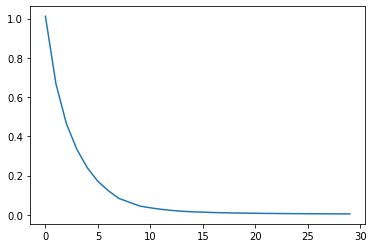

In [39]:
plt.plot(tr_loss_hist)

# many to one Stacking 
* 여러 층으로 구성된 RNN모형을 생성하여, 예측의 성능을 향상시킵니다. 
![stackedRNN.png](https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fbe5HZi%2FbtqDx6bOf9K%2F6PWk0BUenrK1WPeZ4sZihK%2Fimg.png)

모형의 목적은 특정 문장을 인식하고, 해당 명언을 richard feynma이 한 말인지, albert einstein이 한 말인지 분류해 주는 모형입니다. 

## 필수 라이브러리 불러오기 

In [44]:
import numpy as np 
import tensorflow as tf 

from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.sequence import pad_sequences 

import matplotlib.pyplot as plt  
# from pprint import pprint 

## 데이터 준비하기 

### 입력 데이터 정의 

In [45]:
sentences = ['What I cannot create, I do not understand.',
            'Intellecuals solve problems, geniuses prevent them',
             'A person who never made a mistake never tied anything new.',
             'The same equations have the same solutions.']

y_data = [1,0,0,1] # 1: richard feynman, 0: albert einstein

### 토큰 사전 만들기 

In [47]:
# 유일한 문자들만 추려내기 
char_set = ['<pad>'] + sorted(list(set(''.join(sentences))))
print(char_set)

['<pad>', ' ', ',', '.', 'A', 'I', 'T', 'W', 'a', 'b', 'c', 'd', 'e', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'y']


In [48]:
# 문자마다 고유의 번호 지정 

# 결과 디코딩시 필요 
idx2char = {idx : char for idx,char in enumerate(char_set)}
# 숫자로 인코딩시 사용 
char2idx = {char:idx for idx, char in enumerate(char_set)}

print(idx2char)
print(char2idx)

{0: '<pad>', 1: ' ', 2: ',', 3: '.', 4: 'A', 5: 'I', 6: 'T', 7: 'W', 8: 'a', 9: 'b', 10: 'c', 11: 'd', 12: 'e', 13: 'g', 14: 'h', 15: 'i', 16: 'k', 17: 'l', 18: 'm', 19: 'n', 20: 'o', 21: 'p', 22: 'q', 23: 'r', 24: 's', 25: 't', 26: 'u', 27: 'v', 28: 'w', 29: 'y'}
{'<pad>': 0, ' ': 1, ',': 2, '.': 3, 'A': 4, 'I': 5, 'T': 6, 'W': 7, 'a': 8, 'b': 9, 'c': 10, 'd': 11, 'e': 12, 'g': 13, 'h': 14, 'i': 15, 'k': 16, 'l': 17, 'm': 18, 'n': 19, 'o': 20, 'p': 21, 'q': 22, 'r': 23, 's': 24, 't': 25, 'u': 26, 'v': 27, 'w': 28, 'y': 29}


### 문장 시퀀스를 숫자의 배열로 변환하기 

In [49]:
x_data = list(map(lambda sentence : [char2idx.get(char) for char in sentence], sentences))

x_data 

[[7,
  14,
  8,
  25,
  1,
  5,
  1,
  10,
  8,
  19,
  19,
  20,
  25,
  1,
  10,
  23,
  12,
  8,
  25,
  12,
  2,
  1,
  5,
  1,
  11,
  20,
  1,
  19,
  20,
  25,
  1,
  26,
  19,
  11,
  12,
  23,
  24,
  25,
  8,
  19,
  11,
  3],
 [5,
  19,
  25,
  12,
  17,
  17,
  12,
  10,
  26,
  8,
  17,
  24,
  1,
  24,
  20,
  17,
  27,
  12,
  1,
  21,
  23,
  20,
  9,
  17,
  12,
  18,
  24,
  2,
  1,
  13,
  12,
  19,
  15,
  26,
  24,
  12,
  24,
  1,
  21,
  23,
  12,
  27,
  12,
  19,
  25,
  1,
  25,
  14,
  12,
  18],
 [4,
  1,
  21,
  12,
  23,
  24,
  20,
  19,
  1,
  28,
  14,
  20,
  1,
  19,
  12,
  27,
  12,
  23,
  1,
  18,
  8,
  11,
  12,
  1,
  8,
  1,
  18,
  15,
  24,
  25,
  8,
  16,
  12,
  1,
  19,
  12,
  27,
  12,
  23,
  1,
  25,
  15,
  12,
  11,
  1,
  8,
  19,
  29,
  25,
  14,
  15,
  19,
  13,
  1,
  19,
  12,
  28,
  3],
 [6,
  14,
  12,
  1,
  24,
  8,
  18,
  12,
  1,
  12,
  22,
  26,
  8,
  25,
  15,
  20,
  19,
  24,
  1,
  14,
  8,
  27,
  12,
  1,
  

In [51]:
x_data_len = list(map(lambda sentence : len(sentence), sentences))
print(x_data_len)

[42, 50, 58, 43]


### padding 

In [52]:
max_sequence = 55 

x_data = pad_sequences(sequences=x_data, maxlen= max_sequence,
                      padding = 'post', truncating = 'post')

print(x_data)
print(x_data_len)
print(y_data)

[[ 7 14  8 25  1  5  1 10  8 19 19 20 25  1 10 23 12  8 25 12  2  1  5  1
  11 20  1 19 20 25  1 26 19 11 12 23 24 25  8 19 11  3  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 5 19 25 12 17 17 12 10 26  8 17 24  1 24 20 17 27 12  1 21 23 20  9 17
  12 18 24  2  1 13 12 19 15 26 24 12 24  1 21 23 12 27 12 19 25  1 25 14
  12 18  0  0  0  0  0]
 [ 4  1 21 12 23 24 20 19  1 28 14 20  1 19 12 27 12 23  1 18  8 11 12  1
   8  1 18 15 24 25  8 16 12  1 19 12 27 12 23  1 25 15 12 11  1  8 19 29
  25 14 15 19 13  1 19]
 [ 6 14 12  1 24  8 18 12  1 12 22 26  8 25 15 20 19 24  1 14  8 27 12  1
  25 14 12  1 24  8 18 12  1 24 20 17 26 25 15 20 19 24  3  0  0  0  0  0
   0  0  0  0  0  0  0]]
[42, 50, 58, 43]
[1, 0, 0, 1]


## 모형 생성 

#####  Hyper Params. 

In [53]:
# 최종 출력 게이트 수 
num_classes = 2 
# hidden dimension 
hidden_dims = [10,10]

# embeding층 입력 
input_dim = output_dim = len(char2idx)
one_hot = np.eye(len(char2idx))

In [54]:
model = Sequential()
model.add(layers.Embedding(input_dim=input_dim, output_dim=output_dim,
                          trainable=False, mask_zero = True,
                          input_length=max_sequence,
                          embeddings_initializer=keras.initializers.Constant(one_hot)))
model.add(layers.SimpleRNN(units=hidden_dims[0], return_sequences=True))
model.add(layers.TimeDistributed(layers.Dropout(rate=0.2)))
model.add(layers.SimpleRNN(units=hidden_dims[1]))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(units=num_classes))

Return Sequence는 첫번째 층의 각 시점에서의 hidden state을 다음 층의 입력으로 전달하기 위함 입니다. 이때, Dropout을 적용해도 각 시점의 hidden값이 정확하게 다음 층으로 전달할 수 있도록 도와주는 API가 TimeDistributed 입니다. 

In [55]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 55, 30)            900       
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 55, 10)            410       
_________________________________________________________________
time_distributed (TimeDistri (None, 55, 10)            0         
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 10)                210       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 22        
Total params: 1,542
Trainable params: 642
Non-trainable params: 900
____________________________________________________

## Training!

### loss의 정의 

In [56]:
def loss_fn(model, x, y, training):    
    return tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(
        y_true=y, y_pred=model(x, training), from_logits=True))

### 하이퍼~ 

In [57]:
lr = .01
epochs = 30
batch_size = 2
opt = tf.keras.optimizers.Adam(learning_rate = lr)

### 데이터 파이프라이 심자! 

In [58]:
tr_dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data))
tr_dataset = tr_dataset.shuffle(buffer_size=4)
tr_dataset = tr_dataset.batch(batch_size=batch_size)

print(tr_dataset)

<BatchDataset shapes: ((None, 55), (None,)), types: (tf.int32, tf.int32)>


### 반복문을 활용한 학습 

In [59]:
# training
tr_loss_hist = []

for epoch in range(epochs):
    avg_tr_loss = 0
    tr_step = 0
    
    for x_mb, y_mb in tr_dataset:
        with tf.GradientTape() as tape:
            tr_loss = loss_fn(model, x=x_mb, y=y_mb, training=True)
        grads = tape.gradient(target=tr_loss, sources=model.variables)
        opt.apply_gradients(grads_and_vars=zip(grads, model.variables))
        avg_tr_loss += tr_loss
        tr_step += 1
    else:
        avg_tr_loss /= tr_step
        tr_loss_hist.append(avg_tr_loss)
    
    if (epoch + 1) % 5 ==0:
        print('epoch : {:3}, tr_loss : {:.3f}'.format(epoch + 1, avg_tr_loss.numpy()))

epoch :   5, tr_loss : 0.093
epoch :  10, tr_loss : 0.022
epoch :  15, tr_loss : 0.013
epoch :  20, tr_loss : 0.007
epoch :  25, tr_loss : 0.005
epoch :  30, tr_loss : 0.005


## 성능 측정하기 

In [60]:
yhat = model.predict(x_data)
yhat = np.argmax(yhat, axis=-1)
print('accuracy : {:.2%}'.format(np.mean(yhat == y_data)))

accuracy : 100.00%


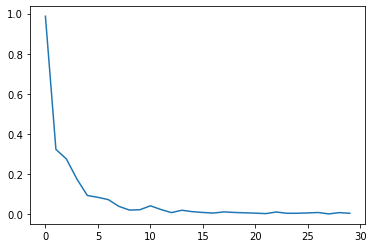

In [61]:
plt.plot(tr_loss_hist)

# many to many 
* 문장 속 각 단어의 품사를 테깅해주는 형태소 분석기를 생성하는 예제를 만듭니다. 
* many to many 예제는 하나의 시퀀스 내에 있는 모든 은닉상태 값을 각각 출력해 각각의 예측을 수행합니다. 
* 또한, 각각의 토큰에 대한 예측과 해당 토큰의 실제 값을 비교하여 각각의 loss를 계산한 후, 이를 시퀀스 단위로 평균을 계산하여 Gradient Descent를 계산하고 이를 back propogation을 통해 가중치를 수정하는데 활용합니다.

![sequenceTagging.png](https://miro.medium.com/max/1838/1*_p0fvCt7noN7j6bXQcZjtQ.png)

* sequence tagging의 대략적인 진행 방식은 아래의 그림과 같습니다. 
![SequenceTag.png](https://miro.medium.com/max/1400/1*3Lnln1txs1lys6fwbVKsJA.png)
이러한 품사테깅을 위해서는 2개의 인덱싱 딕셔너리가 필요합니다.   
    - 토큰의 정수 인덱스와 값을 담을 dict,, 
    - 정답으로 활용할 품사와 그에대한 키 인덱스가 포함되는 dict. 

##### Masking 
* 시퀀스의 모든 token을 활용해 예측과 연산, loss의 계산을 진행하는 특성에 의해 우리는 Masking 작업을 진행해야 합니다. 
* masking이란 우리가 sequence의 길이를 맞추기 위해 Padding작업을 수행할때 포함시킨 \<pad\>토큰을 loss에서 고려하지 않는 것을 말합니다. 
* 패딩을 수행할때, \<pad\>토큰에 대한 정보를 1과0으로 이루어진 벡터로 생성하고, loss를 계산할때, 각각의 토큰의 로스가 담긴 배열과의 element wise(원소끼리의 곱)을 통해 연산에서 제외해주는 방식을 의미합니다. 

## 필요한 라이브러리 불러오기 

In [1]:
import numpy as np 
import tensorflow as tf 

from tensorflow import keras 
from  tensorflow.keras import layers 
from tensorflow.keras import Sequential, Model 
from tensorflow.keras.preprocessing.sequence import pad_sequences 

import matplotlib.pyplot as plt 

## 데이터 준비하기 

In [2]:
# 단어로 이루어진 토큰으로 이루어진 문장의 vector로 구성된 matrix
sentences = [['I', 'feel', 'hungry'],
             ['tensorflow', 'is', 'very', 'difficult'],
             ['tensorflow', 'is', 'a', 'framework', 'for', 'deep', 'learning'],
             ['tensorflow', 'is', 'very', 'fast', 'changing']]

# 각각의 토큰의 품사(정답) 
pos = [['pronoun', 'verb', 'adjective'],
       ['noun', 'verb', 'adverb', 'adjective'],
       ['noun', 'verb', 'determiner', 'noun', 'preposition', 'adjective', 'noun'],
       ['noun', 'verb', 'adverb', 'adjective', 'verb']] 

## dataset 전처리 
* 토큰에 대한 dict 
* 품사에 대한 dict 

### Token dictionary 

In [3]:
word_list = sum(sentences,[])
word_list

['I',
 'feel',
 'hungry',
 'tensorflow',
 'is',
 'very',
 'difficult',
 'tensorflow',
 'is',
 'a',
 'framework',
 'for',
 'deep',
 'learning',
 'tensorflow',
 'is',
 'very',
 'fast',
 'changing']

In [4]:
# 중복 제거 
word_list = sorted(set(word_list))
word_list

['I',
 'a',
 'changing',
 'deep',
 'difficult',
 'fast',
 'feel',
 'for',
 'framework',
 'hungry',
 'is',
 'learning',
 'tensorflow',
 'very']

In [5]:
# 페트토큰 추가 
word_list = ['<pad>'] + word_list 

# 딕셔너리 생성 
word2idx = {word: idx for idx,word in enumerate(word_list)}
idx2word = {idx: word for idx,word in enumerate(word_list)}

print(word2idx)
print(idx2word)
print(len(word2idx))

{'<pad>': 0, 'I': 1, 'a': 2, 'changing': 3, 'deep': 4, 'difficult': 5, 'fast': 6, 'feel': 7, 'for': 8, 'framework': 9, 'hungry': 10, 'is': 11, 'learning': 12, 'tensorflow': 13, 'very': 14}
{0: '<pad>', 1: 'I', 2: 'a', 3: 'changing', 4: 'deep', 5: 'difficult', 6: 'fast', 7: 'feel', 8: 'for', 9: 'framework', 10: 'hungry', 11: 'is', 12: 'learning', 13: 'tensorflow', 14: 'very'}
15


### dict. for part of speech 

In [7]:
# 하나의 배열로 만들기 
pos_list = sum(pos,[])
# 중복 제거 및 정렬 
pos_list = sorted(set(pos_list))
# 패드토큰 추가 
pos_list = ["<pad>"] + pos_list

# 사전 구성 
pos2idx = {pos : idx for idx,pos in enumerate(pos_list)}
idx2pos = {idx : pos for idx,pos in enumerate(pos_list)}

print(pos2idx)
print(idx2pos)
print(len(pos2idx))

{'<pad>': 0, 'adjective': 1, 'adverb': 2, 'determiner': 3, 'noun': 4, 'preposition': 5, 'pronoun': 6, 'verb': 7}
{0: '<pad>', 1: 'adjective', 2: 'adverb', 3: 'determiner', 4: 'noun', 5: 'preposition', 6: 'pronoun', 7: 'verb'}
8


### 정수 인코딩 및 Padding 진행 
* 중요!! - 패딩을 진행할때, padding이 아닌 자리를 기억할 x_data_mask 를 생성합니다. 
* 또한, 실제 문장의 길이를 기억할 유효 자리수에 대한 정보도 기억해 주어야 합니다. 

In [9]:
# 문장의 최대 길이 설정 
max_sequence = 10 

# 정수 인코딩 진행 
x_data = list(map(lambda sentence: [word2idx.get(token) for token in sentence], sentences))
y_data = list(map(lambda sentence : [pos2idx.get(token) for token in sentence], pos))

# 패딩 진행, 동시에 패딩 과정에 대한 정보를 저장합니다, 
x_data = pad_sequences(sequences=x_data, maxlen=max_sequence, padding='post')
## 이부분! 
x_data_mask = ((x_data != 0)*1).astype(np.float32)
x_data_len = list(map(lambda sentence : len(sentence), sentences))

y_data = pad_sequences(sequences=y_data, maxlen=max_sequence, padding='post')

print(x_data, x_data_len)
print(x_data_mask)
print(y_data)

[[ 1  7 10  0  0  0  0  0  0  0]
 [13 11 14  5  0  0  0  0  0  0]
 [13 11  2  9  8  4 12  0  0  0]
 [13 11 14  6  3  0  0  0  0  0]] [3, 4, 7, 5]
[[1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]]
[[6 7 1 0 0 0 0 0 0 0]
 [4 7 2 1 0 0 0 0 0 0]
 [4 7 3 4 5 1 4 0 0 0]
 [4 7 2 1 7 0 0 0 0 0]]


## 모형 생성

In [10]:
# creating rnn for "many to many" sequence tagging
num_classes = len(pos2idx)
hidden_dim = 10

input_dim = len(word2idx)
output_dim = len(word2idx)
one_hot = np.eye(len(word2idx))

model = Sequential()
model.add(layers.Embedding(input_dim=input_dim, output_dim=output_dim, mask_zero=True,
                           trainable=False, input_length=max_sequence,
                           embeddings_initializer=keras.initializers.Constant(one_hot)))
model.add(layers.SimpleRNN(units=hidden_dim, return_sequences=True))
model.add(layers.TimeDistributed(layers.Dense(units=num_classes)))

모든 시퀀스에서 정답을 내야 하므로 Return seuence를 통해 모든 은닉상태를 출력하고, 이를 모두 각각 Dense층으로 TimeDistributed를 통해 매칭해 전달하여, 최종적인 값을 도출했습니다.

In [11]:
model.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001ABFFDBA6D0>>

## 학습 

### loss 함수 정의 
* 기본적인 컨셉은 sequence내의 모든 토큰에 대해, 예측과 실제를 비교하는 것입니다. 
* 이때, pad토큰은 연산에서 제외되어야 합니다. 
* 따라서, pad에 대한 loss에는 0을, 그 외에는 1을 곱해 pad에 대한 loss를 제외하고 이 값들을 모두 더하는 과정을 거칩니다. 
* 도출된 값을 pad를 제외한 유효 문장길이로 나누어 평균을 계산합니다. 

In [12]:
def loss_fn(model, x, y, x_len, max_sequence):
    masking = tf.sequence_mask(x_len, maxlen=max_sequence, dtype=tf.float32)
    valid_time_step = tf.cast(x_len,dtype=tf.float32)    
    sequence_loss = tf.keras.losses.sparse_categorical_crossentropy(
        y_true=y, y_pred=model(x), from_logits=True) * masking    
    sequence_loss = tf.reduce_sum(sequence_loss, axis=-1) / valid_time_step    
    sequence_loss = tf.reduce_mean(sequence_loss)    
    return sequence_loss

### Hyper Params 

In [13]:
learning_rate = 0.1 
epochs = 30 
batch_size = 2 
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

### make data pipline 

In [14]:
training_dataset = tf.data.Dataset.from_tensor_slices((x_data,y_data,x_data_len))
training_dataset = training_dataset.shuffle(buffer_size = 4)
training_dataset = training_dataset.batch(batch_size=2)

print(training_dataset)

<BatchDataset shapes: ((None, 10), (None, 10), (None,)), types: (tf.int32, tf.int32, tf.int32)>


### training 

In [16]:
# training
tr_loss_hist = []

for epoch in range(epochs):
    avg_tr_loss = 0
    tr_step = 0
    
    for x_mb, y_mb, x_mb_len in training_dataset:
        with tf.GradientTape() as tape:
            tr_loss = loss_fn(model, x=x_mb, y=y_mb, x_len=x_mb_len, max_sequence=max_sequence)
        grads = tape.gradient(target=tr_loss, sources=model.variables)
        optimizer.apply_gradients(grads_and_vars=zip(grads, model.variables))
        avg_tr_loss += tr_loss
        tr_step += 1
    else:
        avg_tr_loss /= tr_step
        tr_loss_hist.append(avg_tr_loss)
    
    if (epoch + 1) % 5 == 0:
        print('epoch : {:3}, tr_loss : {:.3f}'.format(epoch + 1, avg_tr_loss))

epoch :   5, tr_loss : 0.224
epoch :  10, tr_loss : 0.011
epoch :  15, tr_loss : 0.003
epoch :  20, tr_loss : 0.001
epoch :  25, tr_loss : 0.001
epoch :  30, tr_loss : 0.001


## 결과 확인하기 

In [20]:
from pprint import pprint 

yhat = model.predict(x_data)
yhat = np.argmax(yhat, axis=-1) * x_data_mask

pprint(list(map(lambda row : [idx2pos.get(elm) for elm in row],yhat.astype(np.int32).tolist())), width = 120)
pprint(pos)

[['pronoun', 'verb', 'adjective', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>'],
 ['noun', 'verb', 'adverb', 'adjective', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>'],
 ['noun', 'verb', 'determiner', 'noun', 'preposition', 'adjective', 'noun', '<pad>', '<pad>', '<pad>'],
 ['noun', 'verb', 'adverb', 'adjective', 'verb', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']]
[['pronoun', 'verb', 'adjective'],
 ['noun', 'verb', 'adverb', 'adjective'],
 ['noun', 'verb', 'determiner', 'noun', 'preposition', 'adjective', 'noun'],
 ['noun', 'verb', 'adverb', 'adjective', 'verb']]


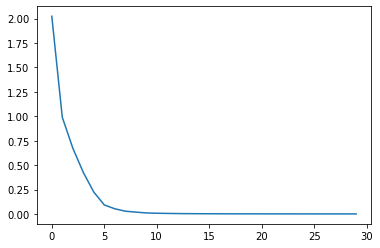

In [21]:
plt.plot(tr_loss_hist)

# Bidirectional RNN (Many 2 Many) 
![bidirectional.png](https://miro.medium.com/max/1313/1*6QnPUSv_t9BY9Fv8_aLb-Q.png) 
* 양방향 RNN은 우리가 기존에 사용하던 RNN모형과 큰 차이가 존재합니다. 바로, 기존의 RNN이 은닉상태의 값을 단순히 앞에서 뒤로 전달하는 forward RNN 방식으로 작동하는 점과 다르게, Forward 방향과 Backward방향으로 동시에 은닉상태의 값을 전달하는 rnn 모형을 구성하는것 입니다. 

* 해당 방식의 모형 구현은 기존의 모형의 각각의 은닉상태에서의 **정보의 양에 대한 불균형성**에서 비롯되었습니다. 
![bidirection2.png](https://blog.kakaocdn.net/dn/bPTdDN/btqDCb3soJP/615rYSKGD0OL6F3YmwBoSk/img.png) 
* 위의 그림은 정보의 불균형에 대한 기존 방식의 문제점과 bidirection model이 이를 해결해주는 방식을 자세히 보여줍니다. 
    - 기존의 forward방식만을 사용하면, 각 hidden state가 가지고 있는 정보의 양은 시점에 따라 크게 달라집니다. 첫번째 hidden state는 첫번째 입력에 대한 정보, 즉 1만큼의 정보만을 가지고 연산을 수행하는 반면에, 두번째 hidden state는 첫번째 층에서 전달된 이전시점의 hidden state에 대한 정보와 해당시점에서의 입력에 대한 정보를 포함해 총 2의 크기의 정보를 가지고 연산을 수행합니다. 
    - 이는 sequence의 길이가 길어질수록 중대한 문제가 됩니다. 
    - 또한, many to many모형에서는 특히, 정보의 양이 상대적으로 부족한 sequence의 초기 부분에서의 예측 및 분류 성능은 크게 떨어진다는 문제점을 지니고 있습니다.
* Bidirectional Model은 정보를 뒤에서부터 읽는 backward방식의 계층을 추가적으로 사용하여, 각 시점에서의 hidden state를 계산할때 사용되는 정보의 양을 일정하게 유지해줍니다. 
    - 각 시점에서의 은닉상태의 계산에 있어, 각 시점에서 forward방식으로 도출된 값과 backward 방식으로 도출된 값을 모두 이용해 연산을 수행합니다. 

* 구체적인 은닉상태의 계산방식은 아래와 같습니다. 
![cal_bidirection.png](https://blog.kakaocdn.net/dn/rOK7v/btqDyE0uYPz/1yO1crLwWks7nKIZBK9A0K/img.png)
1. 해당시점에서 각각 Forward방식과 Backward 방식으로 도출된 은닉상태의 값을 concat하여 새로운 형태의 vector를 생성합니다. 
2. 새로운 vector에 weight와 bias를 붙여 예측값을 도출합니다. 
(단, weight와 bias matrix는 모든 sequence에서 공통으로 사용합니다.)  

* loss의 계산은 기존의 many to many방식에서와 동일하게 각 은닉상태에 대한 loss를 계산하고, 이를 sequence별로 평균을 적용해 backpropogation을 진행합니다. 
* 또한 pad토큰에 대해 masking을 적용하는 방식도 이전과 동일합니다. 

**설명은 다소 복잡할 수 있지만, 실제 구현에 있어서의 변경사항은 모형 구현시 한줄의 수정만 있으면 가능합니다.**

## 필요한 라이브러리 불러오기 

In [22]:
import numpy as np 
import tensorflow as tf 

from tensorflow import keras 
from tensorflow.keras import Sequential, Model 
from tensorflow.keras import layers 
from tensorflow.keras.preprocessing.sequence import pad_sequences 

import matplotlib.pyplot as plt 
from pprint import pprint 

## 데이터 준비하기 

In [23]:
# 이전의 문제와 동일한 예제를 풀이합니다.  
# example data
sentences = [['I', 'feel', 'hungry'],
     ['tensorflow', 'is', 'very', 'difficult'],
     ['tensorflow', 'is', 'a', 'framework', 'for', 'deep', 'learning'],
     ['tensorflow', 'is', 'very', 'fast', 'changing']]
pos = [['pronoun', 'verb', 'adjective'],
     ['noun', 'verb', 'adverb', 'adjective'],
     ['noun', 'verb', 'determiner', 'noun', 'preposition', 'adjective', 'noun'],
     ['noun', 'verb', 'adverb', 'adjective', 'verb']]

## 데이터 전처리 

In [24]:
# token dictionary 생성하기 
word_list = sum(sentences, [])
word_list = sorted(set(word_list))
word_list = ['<pad>'] + word_list

word2idx = {word:idx for idx, word in enumerate(word_list)}
idx2word = {idx:word for idx, word in enumerate(word_list)}

print(word2idx)
print(idx2word)
print(len(idx2word))

{'<pad>': 0, 'I': 1, 'a': 2, 'changing': 3, 'deep': 4, 'difficult': 5, 'fast': 6, 'feel': 7, 'for': 8, 'framework': 9, 'hungry': 10, 'is': 11, 'learning': 12, 'tensorflow': 13, 'very': 14}
{0: '<pad>', 1: 'I', 2: 'a', 3: 'changing', 4: 'deep', 5: 'difficult', 6: 'fast', 7: 'feel', 8: 'for', 9: 'framework', 10: 'hungry', 11: 'is', 12: 'learning', 13: 'tensorflow', 14: 'very'}
15


In [26]:
# 품사 dict 생성하기 
pos_list = sum(pos,[])
pos_list = sorted(set(pos_list))
pos_list = ['<pad>'] + pos_list 

pos2idx = {pos:idx for idx,pos in enumerate(pos_list)}
idx2pos = {idx:pos for idx,pos in enumerate(pos_list)}

print(pos2idx)
print(idx2pos)
print(len(pos2idx))

{'<pad>': 0, 'adjective': 1, 'adverb': 2, 'determiner': 3, 'noun': 4, 'preposition': 5, 'pronoun': 6, 'verb': 7}
{0: '<pad>', 1: 'adjective', 2: 'adverb', 3: 'determiner', 4: 'noun', 5: 'preposition', 6: 'pronoun', 7: 'verb'}
8


In [27]:
# 각 배열을 정수 인코딩 하여 데이터 생성하기 
max_sequence = 10 
x_data = list(map(lambda sentence: [word2idx.get(token) for token in sentence], sentences))
y_data = list(map(lambda sentence : [pos2idx.get(token) for token in sentence], pos))

In [28]:
# padding 진행하기, 이에 대한 정보를 담을 데이터도 생성합니다. 
x_data = pad_sequences(sequences=x_data, maxlen=max_sequence, padding='post')

# 마스크 정보 및 데이터의 유효길이 담아두기 
x_data_mask = ((x_data != 0)*1).astype(np.float32)
x_data_len = list(map(lambda sentence : len(sentence), sentences))

In [34]:
# y데이터 패딩 
y_data = pad_sequences(sequences=y_data, maxlen=max_sequence, padding='post')

In [35]:
# checking data
print(x_data, x_data_len)
print(x_data_mask)
print(y_data)

[[ 1  7 10  0  0  0  0  0  0  0]
 [13 11 14  5  0  0  0  0  0  0]
 [13 11  2  9  8  4 12  0  0  0]
 [13 11 14  6  3  0  0  0  0  0]] [3, 4, 7, 5]
[[1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]]
[[6 7 1 0 0 0 0 0 0 0]
 [4 7 2 1 0 0 0 0 0 0]
 [4 7 3 4 5 1 4 0 0 0]
 [4 7 2 1 7 0 0 0 0 0]]


## 모형 생성하기 
* 기존의 rnn층을 Bidirectional로 감싸주면 간단하게 구현이 가능합니다. 

In [36]:
# creating bidirectional rnn for "many to many" sequence tagging
num_classes = len(pos2idx)
hidden_dim = 10

input_dim = len(word2idx)
output_dim = len(word2idx)
one_hot = np.eye(len(word2idx))

model = Sequential()
model.add(layers.InputLayer(input_shape=(max_sequence,)))
model.add(layers.Embedding(input_dim=input_dim, output_dim=output_dim, mask_zero=True,
                                 trainable=False, input_length=max_sequence,
                                 embeddings_initializer=keras.initializers.Constant(one_hot)))
model.add(layers.Bidirectional(keras.layers.SimpleRNN(units=hidden_dim, return_sequences=True)))
model.add(layers.TimeDistributed(keras.layers.Dense(units=num_classes)))

## Training 

In [37]:
# creating loss function
def loss_fn(model, x, y, x_len, max_sequence):
    masking = tf.sequence_mask(x_len, maxlen=max_sequence, dtype=tf.float32)
    valid_time_step = tf.cast(x_len,dtype=tf.float32)
    sequence_loss = tf.keras.losses.sparse_categorical_crossentropy(
        y_true=y, y_pred=model(x), from_logits=True) * masking    
    sequence_loss = tf.reduce_sum(sequence_loss, axis=-1) / valid_time_step
    sequence_loss = tf.reduce_mean(sequence_loss)
    return sequence_loss

# creating and optimizer
lr = 0.1
epochs = 30
batch_size = 2 
opt = tf.keras.optimizers.Adam(learning_rate = lr)

In [38]:
# generating data pipeline
tr_dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data, x_data_len))
tr_dataset = tr_dataset.shuffle(buffer_size=4)
tr_dataset = tr_dataset.batch(batch_size = 2)

print(tr_dataset)

<BatchDataset shapes: ((None, 10), (None, 10), (None,)), types: (tf.int32, tf.int32, tf.int32)>


In [39]:
# training
tr_loss_hist = []

for epoch in range(epochs):
    avg_tr_loss = 0
    tr_step = 0
    
    for x_mb, y_mb, x_mb_len in tr_dataset:
        with tf.GradientTape() as tape:
            tr_loss = loss_fn(model, x=x_mb, y=y_mb, x_len=x_mb_len, max_sequence=max_sequence)
        grads = tape.gradient(target=tr_loss, sources=model.variables)
        opt.apply_gradients(grads_and_vars=zip(grads, model.variables))
        avg_tr_loss += tr_loss
        tr_step += 1
    else:
        avg_tr_loss /= tr_step
        tr_loss_hist.append(avg_tr_loss)
    
    if (epoch + 1) % 5 == 0:
        print('epoch : {:3}, tr_loss : {:.3f}'.format(epoch + 1, avg_tr_loss))

epoch :   5, tr_loss : 0.008
epoch :  10, tr_loss : 0.000
epoch :  15, tr_loss : 0.000
epoch :  20, tr_loss : 0.000
epoch :  25, tr_loss : 0.000
epoch :  30, tr_loss : 0.000


## 성능 확인하기 

In [40]:
yhat = model.predict(x_data)
yhat = np.argmax(yhat, axis=-1) * x_data_mask

pprint(list(map(lambda row : [idx2pos.get(elm) for elm in row],yhat.astype(np.int32).tolist())), width = 120)
pprint(pos)

[['pronoun', 'verb', 'adjective', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>'],
 ['noun', 'verb', 'adverb', 'adjective', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>'],
 ['noun', 'verb', 'determiner', 'noun', 'preposition', 'adjective', 'noun', '<pad>', '<pad>', '<pad>'],
 ['noun', 'verb', 'adverb', 'adjective', 'verb', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']]
[['pronoun', 'verb', 'adjective'],
 ['noun', 'verb', 'adverb', 'adjective'],
 ['noun', 'verb', 'determiner', 'noun', 'preposition', 'adjective', 'noun'],
 ['noun', 'verb', 'adverb', 'adjective', 'verb']]


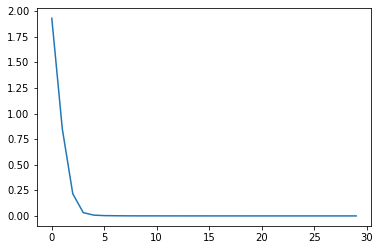

In [41]:
plt.plot(tr_loss_hist)

기존의 many2many방식보다 training loss가 빨리 감소하며, 또한 loss가 0이 됨을 볼 수 있었습니다 . 

# Sequence to Sequence 
* sequence to sequence 모형을 활용하여 가장 간단한 번역기를 만듭니다. 
* 가장 대표적인 활용 예시는 번역, 챗봇 등이 있습니다. 
* sequence2sequence 모형은 입력 문장과 정답 문장을 입력받아 학습을 진행합니다. 
* Sequence to Sequence 모형은 크게 입력값이 순차적으로 입력되는 Encoder 모듈과, 재귀적으로 출력값을 산출하는 Decoder 모듈로 이루어집니다. 

![seqmodel.png](https://blog.kakaocdn.net/dn/cByx3E/btqDyNiSnP2/GX8SnhRzTR8zRwTk2KBoJ0/img.png)
* 특히, Decoder 모듈은 자신의 이전 출력값을 누적적으로 입력으로 다시 받아 다음 단어를 유추합니다. 
* 또한 문장의 시작과 끝의 정보를 인식할 수 있도록 \<시작\>토큰과 \<End\>토큰을 함께 토큰 dict.에 포함하여 모형을 구현합니다. 


![decoder.png](https://blog.kakaocdn.net/dn/VGRNm/btqDCb3D0Wn/MxXJ3uxfp8WrdSK0e9IdHK/img.png)

## 라이브러리 호출 

In [2]:
import tensorflow as tf 
import numpy as np 

from sklearn.model_selection import train_test_split 
from tensorflow import keras 
from tensorflow.keras.preprocessing.sequence import pad_sequences

from pprint import pprint 
import os 

import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc 

rc('font', family='MalgunGothic')

## 데이터셋 준비 

In [3]:
# x 데이터 
sources = [['I', 'feel', 'hungry'],
     ['tensorflow', 'is', 'very', 'difficult'],
     ['tensorflow', 'is', 'a', 'framework', 'for', 'deep', 'learning'],
     ['tensorflow', 'is', 'very', 'fast', 'changing']]

# 목적 데이터 
targets = [['나는', '배가', '고프다'],
           ['텐서플로우는', '매우', '어렵다'],
           ['텐서플로우는', '딥러닝을', '위한', '프레임워크이다'],
           ['텐서플로우는', '매우', '빠르게', '변화한다']]

## 데이터 전처리 

### source의 토큰 dictionary 생성 

In [4]:
s_vocab = list(set(sum(sources, [])))
s_vocab.sort()

s_vocab = ["<pad>"] + s_vocab

source2idx =  {word : idx for idx, word in enumerate(s_vocab)}
idx2source = {idx : word for idx, word in enumerate(s_vocab)}

print(source2idx)

{'<pad>': 0, 'I': 1, 'a': 2, 'changing': 3, 'deep': 4, 'difficult': 5, 'fast': 6, 'feel': 7, 'for': 8, 'framework': 9, 'hungry': 10, 'is': 11, 'learning': 12, 'tensorflow': 13, 'very': 14}


### target에 대한 token dict 생성 

In [19]:
t_vocab = list(set(sum(targets, [])))
t_vocab.sort()

# decoder에 입력되는 데이터인 target은 문장의 시작과 끝을 구분할 특별한 토큰이 필요합니다. 
t_vocab = ["<pad>","<bos>", "<eos>"] + t_vocab 
# begining of sentence / end of sentence 

target2idx = {word:idx for idx,word in enumerate(t_vocab)}
idx2target = {idx:word for idx, word in enumerate(t_vocab)}

print(target2idx)

{'<pad>': 0, '<bos>': 1, '<eos>': 2, '고프다': 3, '나는': 4, '딥러닝을': 5, '매우': 6, '배가': 7, '변화한다': 8, '빠르게': 9, '어렵다': 10, '위한': 11, '텐서플로우는': 12, '프레임워크이다': 13}


### 데이터 인덱싱 함수 구현
* assert _ in [], '안내문장' 구문은 마치 C언어의 switch case구문처럼, 사용자의 입력에 따라 다른 실행을 산출하는 구문입니다. 
* 밑에서 동일한 함수를 source와 target에 대해 적용하기 위해 사용합니다. 
* 또, target문자열의 경우 입력과 출력 데이터를 각각 설정합니다. 각각의 문장을 아래의 방식으로 전처리 후 정수 인코딩과 패딩을 진행합니다.  
    - 입력 : \[\<bos\>, "..", "..", "..", \<eos\>\] 
    - 출력 : \["..", "..", "..", \<eos\>\] 

In [6]:
# test = list(map(lambda sentence : sentence + ['<eos>'], targets))
# test = t_input = list(map(lambda sentence : [target2idx.get(token) for token in sentence], test))

# print(test )

In [16]:
def preprocess(sequences, max_len, dic, mode = 'source'):
    assert mode in ['source', 'target'], 'source와 target 중 원하는 모드를 선택해주세요'
    
    if mode == 'source':
        # 인코더에 들어갈 데이터를 정수 인코딩합니다.
        s_input = list(map(lambda sentence : [dic.get(token) for token in sentence], sequences))
        s_len = list(map(lambda sentence : len(sentence), s_input))
        s_input = pad_sequences(sequences = s_input, maxlen=max_len, padding='post', truncating='post')
        
        return s_len, s_input 
    
    elif mode == 'target':
        # 디코더의 입력으로 들어갈 target 데이터를 전처리 합니다. 
        # 입력과 정답의 데이터 두가지 형태를 생성합니다. 
        t_input = list(map(lambda sentence :['<bos>']+sentence+['<eos>'],sequences))
        t_input = list(map(lambda sentence :[dic.get(token)for token in sentence] ,t_input))     
        t_len = list(map(lambda sentence : len(sentence), t_input))
        t_input = pad_sequences(sequences = t_input, maxlen = max_len, padding = 'post', truncating = 'post')
        # 정답값 데이터를 만들어줍니다. 
        t_output = list(map(lambda sentence : sentence+['<eos>'], sequences))
        t_output = list(map(lambda sentence : [dic.get(token) for token in sentence], t_output))
        t_output = pad_sequences(sequences=t_output, maxlen=max_len, padding='post', truncating='post')
        
        return t_len, t_input, t_output

이제 생성한 함수를 이용해 전처리를 진행합니다. 

In [17]:
# preprocessing for source
s_max_len = 10
s_len, s_input = preprocess(sequences = sources,
                            max_len = s_max_len, dic = source2idx, mode = 'source')
print(s_len, s_input)

[3, 4, 7, 5] [[ 1  7 10  0  0  0  0  0  0  0]
 [13 11 14  5  0  0  0  0  0  0]
 [13 11  2  9  8  4 12  0  0  0]
 [13 11 14  6  3  0  0  0  0  0]]


In [20]:
# preprocessing for target
t_max_len = 12
t_len, t_input, t_output = preprocess(sequences = targets,
                                      max_len = t_max_len, dic = target2idx, mode = 'target')
print(t_len, t_input, t_output)

[5, 5, 6, 6] [[ 1  4  7  3  2  0  0  0  0  0  0  0]
 [ 1 12  6 10  2  0  0  0  0  0  0  0]
 [ 1 12  5 11 13  2  0  0  0  0  0  0]
 [ 1 12  6  9  8  2  0  0  0  0  0  0]] [[ 4  7  3  2  0  0  0  0  0  0  0  0]
 [12  6 10  2  0  0  0  0  0  0  0  0]
 [12  5 11 13  2  0  0  0  0  0  0  0]
 [12  6  9  8  2  0  0  0  0  0  0  0]]


## Hyper-parameter 생성 

In [21]:
# hyper-parameters
epochs = 200
batch_size = 4
learning_rate = .005
total_step = epochs / batch_size
buffer_size = 100
n_batch = buffer_size//batch_size
embedding_dim = 32
units = 32

In [22]:
# input데이터 파이프라이닝 
data = tf.data.Dataset.from_tensor_slices((s_len, s_input, t_len, t_input, t_output))
data = data.shuffle(buffer_size = buffer_size)
data = data.batch(batch_size = batch_size)
# s_mb_len, s_mb_input, t_mb_len, t_mb_input, t_mb_output = iterator.get_next()

## 모형 유닛 설정 

In [23]:
def gru(units):
    return tf.keras.layers.GRU(units, 
                               return_sequences=True, 
                               return_state=True, 
                               recurrent_initializer='glorot_uniform')
# xiavier initalization을 이용해 모형에 들어가는 모든 가중치를 초기화해 성능을 높입니다. 

In [27]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, encoder_units, batch_size):
        super(Encoder, self).__init__()
        self.batch_size = batch_size
        self.encoder_units = encoder_units 
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = gru(self.encoder_units)
    # 모델 연결 
    def call(self, x, hidden):
        x = self.embedding(x)
        output, state = self.gru(x, initial_state = hidden)
        
        return output, state 
    def initialize_hidden_state(self):
        return tf.zeros((self.batch_size, self.encoder_units))

##### 디코더를 생성하는 class 
* 임베딩층을 타오 들어온 값이 순차적으로 gru를 통과한 후, FC layer의 입력에 맞게 펼쳐져 분류가 수행되는 모형입니다

In [25]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, decoder_units, batch_size):
        super(Decoder, self).__init__()
        self.batch_size = batch_size
        self.decoder_units = decoder_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = gru(self.decoder_units)
        self.fc = tf.keras.layers.Dense(vocab_size)
                
    def call(self, x, hidden, enc_output):
        
        x = self.embedding(x)
        output, state = self.gru(x, initial_state = hidden)
        
        # output shape == (batch_size * 1, hidden_size)
        output = tf.reshape(output, (-1, output.shape[2]))
        
        # output shape == (batch_size * 1, vocab)
        x = self.fc(output)
        
        return x, state
        
    def initialize_hidden_state(self):
        return tf.zeros((self.batch_sz, self.dec_units))

##### 모형의 각 개체 생성

In [28]:
encoder = Encoder(len(source2idx), embedding_dim, units, batch_size)
decoder = Decoder(len(target2idx), embedding_dim, units, batch_size)

## 비용함수 정의 

In [30]:
def loss_function(real, pred):
    mask = 1 - np.equal(real, 0)
    loss_ = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=real, logits=pred) * mask
    
    return tf.reduce_mean(loss_)

In [29]:
# 1 - np.equal(real, 0)

## 옵티마이저

In [31]:
optimizer = tf.keras.optimizers.Adam()

In [32]:
# checkpoint_dir = './data_out/training_checkpoints'
# checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
# checkpoint = tf.train.Checkpoint(optimizer=optimizer,
#                                 encoder=encoder,
#                                 decoder=decoder)

## 학습

In [34]:
for epoch in range(epochs):
    
    hidden = encoder.initialize_hidden_state()
    total_loss = 0
    
    for i, (s_len, s_input, t_len, t_input, t_output) in enumerate(data):
        loss = 0
        with tf.GradientTape() as tape:
            enc_output, enc_hidden = encoder(s_input, hidden)

            dec_hidden = enc_hidden
            
            dec_input = tf.expand_dims([target2idx['<bos>']] * batch_size, 1)
            
            #Teacher Forcing: feeding the target as the next input
            for t in range(1, t_input.shape[1]):
                
                predictions, dec_hidden = decoder(dec_input, dec_hidden, enc_output)
                
                loss += loss_function(t_input[:, t], predictions)
            
                dec_input = tf.expand_dims(t_input[:, t], 1) #using teacher forcing
                
        batch_loss = (loss / int(t_input.shape[1]))
        
        total_loss += batch_loss
        
        variables = encoder.variables + decoder.variables
        
        gradient = tape.gradient(loss, variables)
        
        optimizer.apply_gradients(zip(gradient, variables))
        
    if epoch % 10 == 0:
        #save model every 10 epoch
        print('Epoch {} Loss {:.4f} Batch Loss {:.4f}'.format(epoch,
                                            total_loss / n_batch,
                                            batch_loss.numpy()))
#         checkpoint.save(file_prefix = checkpoint_prefix)

Epoch 0 Loss 0.0397 Batch Loss 0.9924
Epoch 10 Loss 0.0387 Batch Loss 0.9668
Epoch 20 Loss 0.0372 Batch Loss 0.9311
Epoch 30 Loss 0.0347 Batch Loss 0.8663
Epoch 40 Loss 0.0302 Batch Loss 0.7559
Epoch 50 Loss 0.0271 Batch Loss 0.6780
Epoch 60 Loss 0.0242 Batch Loss 0.6043
Epoch 70 Loss 0.0216 Batch Loss 0.5394
Epoch 80 Loss 0.0191 Batch Loss 0.4772
Epoch 90 Loss 0.0167 Batch Loss 0.4175
Epoch 100 Loss 0.0144 Batch Loss 0.3602
Epoch 110 Loss 0.0122 Batch Loss 0.3058
Epoch 120 Loss 0.0103 Batch Loss 0.2563
Epoch 130 Loss 0.0085 Batch Loss 0.2134
Epoch 140 Loss 0.0071 Batch Loss 0.1780
Epoch 150 Loss 0.0060 Batch Loss 0.1506
Epoch 160 Loss 0.0052 Batch Loss 0.1304
Epoch 170 Loss 0.0047 Batch Loss 0.1163
Epoch 180 Loss 0.0043 Batch Loss 0.1065
Epoch 190 Loss 0.0040 Batch Loss 0.0995


In [33]:
# tf.expand_dims([target2idx['<bos>']] * batch_size, 1)

<tf.Tensor: shape=(4, 1), dtype=int32, numpy=
array([[1],
       [1],
       [1],
       [1]])>

##### Teaching Force 
![TeachingForce.png](https://miro.medium.com/max/842/1*U3d8D_GnfW13Y3nDgvwJSw.png)
* Teaching Force란 디코더의 예측성능 향상을 위해 모형의 각 상태의 입력에 이전 상태의 출력을 넣어주는것이 아니라, 실제 정답값을 직접 넣어주는 방식을 의미합니다. 
* 만약, 이러한 과정이 없다면, 첫 예측의 결과가 틀렸을때, 전체 문장의 정답이 달라지기 때문에 이를 방지하기 위해 이전 상태의 정답이 틀려도 실제 값을 넣어줌으로써 학습을 이어 진행하는 방식입니다. 

## 예측

In [35]:
#restore checkpoint

# checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [36]:
sentence = 'I feel hungry'

In [37]:
def prediction(sentence, encoder, decoder, inp_lang, targ_lang, max_length_inp, max_length_targ):
    
    inputs = [inp_lang[i] for i in sentence.split(' ')]
    inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs], maxlen=max_length_inp, padding='post')
    inputs = tf.convert_to_tensor(inputs)
        
    result = ''
    
    hidden = [tf.zeros((1, units))]
    enc_out, enc_hidden = encoder(inputs, hidden)
        
    dec_hidden = enc_hidden
    dec_input = tf.expand_dims([targ_lang['<bos>']], 0)
    
    for t in range(max_length_targ):
        predictions, dec_hidden = decoder(dec_input, dec_hidden, enc_out)
        
        predicted_id = tf.argmax(predictions[0]).numpy()

        result += idx2target[predicted_id] + ' '

        if idx2target.get(predicted_id) == '<eos>':
            return result, sentence
        
        # the predicted ID is fed back into the model
        dec_input = tf.expand_dims([predicted_id], 0)    
    
    return result, sentence
    
result, output_sentence = prediction(sentence, encoder, decoder, source2idx, target2idx, s_max_len, t_max_len)

print(sentence)
print(result)

I feel hungry
나는 배가 고프다 <eos> 


모형의 구조가 상당부분 복잡해 복습이 필요합니다..